# Amazon Top Rated Smartphones & Accessories 2021 

#### 1. Amazon.com, Inc. is an American multinational conglomerate that focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence. It is one of the Big Five companies in the U.S. information technology industry, along with Google, Apple, Microsoft, and Facebook.
#### 2. Amazon Top Rated Smartphones & Accessories 2021 Dataset was scraped from amazon.in website of the e-commerce amazon India. the dataset contains smartphones title with its specification according to its rating and number of review count in the dataset column. there is a piece of additional information about the smartphone. that is its offer price and actual price with its discount percentage and delivery options
#### 3.Amazon Top Rated Smartphones & Accessories 2021 dataset is scraped from the e-commerce website.

### Q1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

### Q2. Load the dataset and read the top 5 and bottom 5 records

In [2]:
df = pd.read_csv("Amazon_data.csv")
df.head()

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery,Status of stock & more offers
0,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",4.2 out of 5 stars,"87,809","₹9,499","₹10,999","Save ₹1,500 (14%)",FREE Delivery by Amazon,NaN
1,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",4.2 out of 5 stars,"74,587","₹6,999","₹8,499","Save ₹1,500 (18%)",FREE Delivery by Amazon,NaN
2,Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GH...,4.2 out of 5 stars,"74,587","₹6,999","₹8,499","Save ₹1,500 (18%)",FREE Delivery by Amazon,NaN
3,"Redmi Note 10 (Aqua Green, 4GB RAM, 64GB Stora...",4.2 out of 5 stars,"95,519","₹13,999","₹15,999","Save ₹2,000 (13%)",FREE Delivery by Amazon,NaN
4,"Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage) ...",4.2 out of 5 stars,"87,809","₹9,499","₹10,999","Save ₹1,500 (14%)",FREE Delivery by Amazon,NaN


In [3]:
df.tail()

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery,Status of stock & more offers
1362,Nillkin Case for Apple iPhone 12 / iPhone 12 P...,5.0 out of 5 stars,1,"₹4,499","₹5,999","Save ₹1,500 (25%)",FREE Delivery by Amazon,Only 1 left in stock.
1363,Nillkin Case for Apple iPhone 12 / iPhone 12 P...,5.0 out of 5 stars,1,"₹3,999","₹4,999","Save ₹1,000 (20%)",FREE Delivery by Amazon,Only 2 left in stock.
1364,Nillkin Case for Samsung Galaxy F62 F 62 / Sam...,5.0 out of 5 stars,1,"₹1,099","₹1,699",Save ₹600 (35%),FREE Delivery by Amazon,Only 1 left in stock.
1365,Nillkin Case for Xiaomi Redmi Note 10 / Note 1...,5.0 out of 5 stars,1,"₹1,299","₹1,699",Save ₹400 (24%),FREE Delivery by Amazon,Only 1 left in stock.
1366,"Nillkin Case for Samsung Galaxy A72 A 72 (6.7""...",5.0 out of 5 stars,1,"₹1,199","₹2,499","Save ₹1,300 (52%)",FREE Delivery by Amazon,Only 2 left in stock.


### Q3.Check the info of the dataframe and write your inferences on data types and shape of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Smartphone                     1367 non-null   object
 1   Rating                         1367 non-null   object
 2   Reviews count                  1367 non-null   object
 3   Offer price                    1153 non-null   object
 4   Actual price                   1041 non-null   object
 5   Saving                         1150 non-null   object
 6   Delivery                       1367 non-null   object
 7   Status of stock & more offers  498 non-null    object
dtypes: object(8)
memory usage: 85.6+ KB


In [5]:
df.shape

(1367, 8)

In [6]:
df.dtypes

Smartphone                       object
Rating                           object
Reviews count                    object
Offer price                      object
Actual price                     object
Saving                           object
Delivery                         object
Status of stock & more offers    object
dtype: object

#### Note: Datatype of all the features is in object type, We need to remove unwanted characters in the data and convert the datatypes to there suitable datatypes.

In [7]:
df.columns # 'columns' method provides name of each column

Index(['Smartphone', 'Rating', 'Reviews count', 'Offer price', 'Actual price',
       'Saving', 'Delivery', 'Status of stock & more offers'],
      dtype='object')

In [8]:
df.nunique() #nuniques() function provides the total number of uniques values present in each feature

Smartphone                       1307
Rating                             11
Reviews count                     363
Offer price                       510
Actual price                      281
Saving                            611
Delivery                            3
Status of stock & more offers      17
dtype: int64

### Q4. Find and drop duplicate values.

In [9]:
df[df.duplicated()]

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery,Status of stock & more offers
144,Nokia 3310 Dual SIM Feature Phone with MP3 Pla...,4.2 out of 5 stars,"12,691","₹4,006","₹4,399",Save ₹393 (9%),FREE Delivery by Amazon,More Buying Choices
145,"Samsung Metro 313 (SM-B313E, Grey)",4.1 out of 5 stars,"7,398","₹2,340",NaN,Get it by,Paid,NaN
192,Nokia 3310 Dual SIM Feature Phone with MP3 Pla...,4.2 out of 5 stars,"12,691","₹4,290","₹4,399",Save ₹109 (2%),FREE Delivery by Amazon,NaN
312,"Samsung Galaxy A72 (Black, 8GB RAM, 128GB Stor...",4.2 out of 5 stars,466,"₹34,999","₹41,999","Save ₹7,000 (17%)",FREE Delivery by Amazon,NaN
336,New Apple iPhone 12 Pro (256GB) - Pacific Blue,4.6 out of 5 stars,576,"₹1,18,900","₹1,29,900","Save ₹11,000 (8%)",FREE Delivery by Amazon,NaN
416,"Mi Redmi 8 Smartphone (Onyx Black, 4GB RAM, 64...",4.1 out of 5 stars,"1,070","₹10,850","₹12,999","Save ₹2,149 (17%)",Paid,Only 2 left in stock.
417,"Honor 7A (Blue, 3GB RAM, 32GB Storage)",4.7 out of 5 stars,3,"₹8,999","₹10,999","Save ₹2,000 (18%)",FREE Delivery by Amazon,NaN
438,"Kechaoda K55+ (Silver, 32GB)",4.1 out of 5 stars,109,₹999,"₹1,299",Save ₹300 (23%),FREE Delivery by Amazon,More Buying Choices
441,"I KALL K48 Keypad Mobile (1.8 Inch, Big Batter...",4.4 out of 5 stars,5,₹719,₹999,Save ₹280 (28%),Paid,NaN
442,"Vivo U20 (Racing Black, Snapdragon 675 AIE, 4G...",4.3 out of 5 stars,"22,750",NaN,NaN,NaN,Paid,NaN


In [10]:
len(df[df.duplicated()])

56

In [11]:
#Removing Duplicates
df.drop_duplicates(keep='first',inplace=True)

In [12]:
## Check for duplicate values again
len(df[df.duplicated()])

0

### After identifying 56 duplicated rows, we successfully removed them from the dataset.

### Q5. Removing unwanted characters and changing the datatype

In [13]:
df.head(2)

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery,Status of stock & more offers
0,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",4.2 out of 5 stars,"87,809","₹9,499","₹10,999","Save ₹1,500 (14%)",FREE Delivery by Amazon,NaN
1,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",4.2 out of 5 stars,"74,587","₹6,999","₹8,499","Save ₹1,500 (18%)",FREE Delivery by Amazon,NaN


### INFERNECE: 
#### The following observations can be made:
    1. The Rating column can be converted to numeric by extracting the rating value from it.
    2. The Review count can be converted to numeric by removing commas from the values.
    3. The Price columns can be converted to numeric by removing commas and rupee signs from the values.
    4. The Saving column can be analyzed to extract the saving value or percentage and convert it to numeric.

### RATING COLUMN

In [14]:
## Splitting the string and Retreving the numeric value and converting the 'feature rating' to float datatype.
df['Rating'] = df['Rating'].str.split(' ').str.get(0).astype(float)

In [15]:
df.head(1)

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery,Status of stock & more offers
0,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",4.2,"87,809","₹9,499","₹10,999","Save ₹1,500 (14%)",FREE Delivery by Amazon,NaN


In [16]:
df.Rating.dtype

dtype('float64')

### REVIEWS COUNT

In [17]:
## Replacing comma and converting feature 'Reviews count' as integer.
df['Reviews count'] = df['Reviews count'].str.replace(',','').astype(int)

In [18]:
df['Reviews count'].dtype

dtype('int32')

### OFFER PRICE

In [19]:
## Replacing comma and '₹' and converting feature 'Offer price' as integer.
df['Offer price'] = df['Offer price'].str.replace(',','')
df['Offer price'] = df['Offer price'].str.replace('₹','')
df['Offer price'] = df['Offer price'].str.replace('.','')

## Note:- Since feature offer price is having null values, the nan values dtype will be float by default, if we try converting 
## datatype into integer it will throw an error, So converting only not null values into int.
## After imputing null values we will convert those datatype also.
df.loc[df['Offer price'].notnull(), 'Offer price'] = df.loc[df['Offer price'].notnull(), 'Offer price'].apply(int)

### ACTUAL PRICE

In [20]:
## Replacing comma and '₹' and converting feature 'Actual price' as integer.
df['Actual price'] = df['Actual price'].str.replace(',','')
df['Actual price'] = df['Actual price'].str.replace('₹','')
df['Actual price'] = df['Actual price'].str.replace('.','')

df.loc[df['Actual price'].notnull(), 'Actual price'] = df.loc[df['Actual price'].notnull(), 'Actual price'].apply(int)

### SAVING

In [21]:
## Splitting the string and retriveing the numeric value.
df['Saving'] = df['Saving'].str.split(' ').str.get(1)

## Replacing comma and '₹' and converting feature 'Actual price' as integer.
df['Saving'] = df['Saving'].str.replace(',','')
df['Saving'] = df['Saving'].str.replace('₹','')
df['Saving'] = df['Saving'].str.replace('.','')
df['Saving'] = df['Saving'].replace(['it','Delivery'],np.nan)

df.loc[df['Saving'].notnull(), 'Saving'] = df.loc[df['Saving'].notnull(), 'Saving'].apply(int)

In [22]:
df.head(2)

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery,Status of stock & more offers
0,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",4.2,87809,9499,10999,1500,FREE Delivery by Amazon,NaN
1,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",4.2,74587,6999,8499,1500,FREE Delivery by Amazon,NaN


In [23]:
df.dtypes

Smartphone                        object
Rating                           float64
Reviews count                      int32
Offer price                       object
Actual price                      object
Saving                            object
Delivery                          object
Status of stock & more offers     object
dtype: object

### Q6. Find missing values and drop / impute them

In [24]:
df.isnull().sum()

Smartphone                         0
Rating                             0
Reviews count                      0
Offer price                      206
Actual price                     313
Saving                           313
Delivery                           0
Status of stock & more offers    838
dtype: int64

#### percentage of missing values

In [25]:
# How to check null values in percentage
df.isnull().sum()/len(df)*100

Smartphone                        0.000000
Rating                            0.000000
Reviews count                     0.000000
Offer price                      15.713196
Actual price                     23.874905
Saving                           23.874905
Delivery                          0.000000
Status of stock & more offers    63.920671
dtype: float64

### INFERENCE

    1.We have missing values in both numeric and categorical features.
    2.For feature Offer price we will check distribution of the data and treat accordingly.
    3.For features Actual price and Saving we will use KNN imputation technique.
    4.For categorical data we impute null values using mode imputation technique.
    5.The feature Status of stock & more offers is having missing values more than 60%, lets drop it.

### Dropping features having more than 45% null values

In [26]:
df.drop(['Status of stock & more offers'],axis=1,inplace=True)

### Analyse price  and saving columns

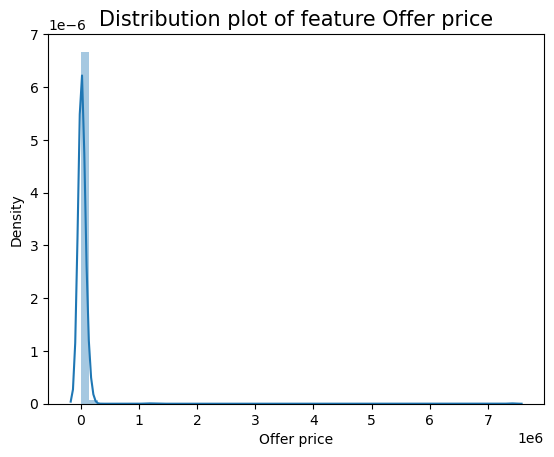

In [27]:
sns.distplot(df['Offer price'])
plt.title('Distribution plot of feature Offer price',fontsize=15)
plt.show()

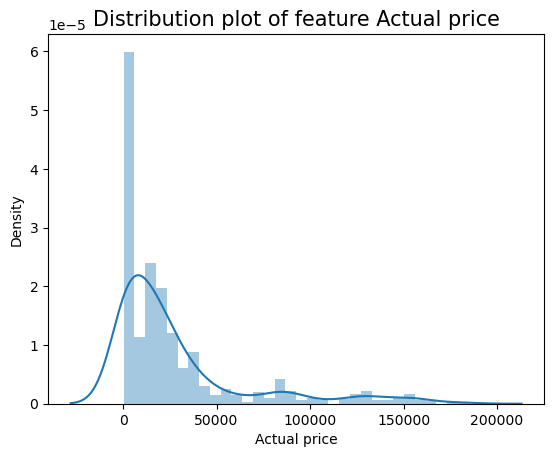

In [28]:
sns.distplot(df['Actual price'])
plt.title('Distribution plot of feature Actual price',fontsize=15)
plt.show()

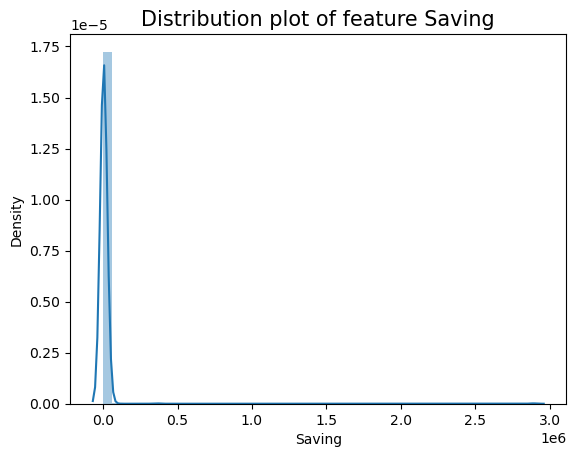

In [29]:
sns.distplot(df['Saving'])
plt.title('Distribution plot of feature Saving',fontsize=15)
plt.show()

- Given the skewness in all the numeric features, we will address the missing values using both median imputation and KNN imputation techniques.

In [30]:
df['Offer price'] = df['Offer price'].fillna(df['Offer price'].median())

In [31]:
## KNN imputation technique.
imputer = KNNImputer(n_neighbors=1)
df.iloc[:,[4,5]] = imputer.fit_transform(df.iloc[:,[4,5]])

In [32]:
df.isnull().sum()

Smartphone       0
Rating           0
Reviews count    0
Offer price      0
Actual price     0
Saving           0
Delivery         0
dtype: int64

- After successfully handling the missing values through imputation, we can now proceed to convert the variables to their appropriate data types.

### Q7. change the datatype from object to int for offerprice, actualprice and saving

In [33]:
df[['Offer price','Actual price','Saving']] = df[['Offer price','Actual price','Saving']].astype(int)

In [34]:
## rechecking the datatypes
df.dtypes

Smartphone        object
Rating           float64
Reviews count      int32
Offer price        int32
Actual price       int32
Saving             int32
Delivery          object
dtype: object

In [35]:
df1 = df.copy()

### Q8. Statistical_summary

In [36]:
Statistical_summary_of_Numerical_Column = df.describe() 
print('The Statistical summary of Numerical Column: ')
print(Statistical_summary_of_Numerical_Column)

The Statistical summary of Numerical Column: 
            Rating  Reviews count   Offer price   Actual price        Saving
count  1311.000000     1311.00000  1.311000e+03    1311.000000  1.311000e+03
mean      4.347521     7295.59878  3.055888e+04   28102.105263  7.324551e+03
std       0.325001    21314.64243  2.117472e+05   32758.342288  8.050069e+04
min       4.000000        1.00000  5.000000e+01     299.000000  1.000000e+00
25%       4.100000        7.00000  2.999000e+03    4999.000000  1.000000e+03
50%       4.200000      341.00000  1.338900e+04   22999.000000  3.500000e+03
75%       4.600000     2323.00000  2.299450e+04   28102.000000  7.324000e+03
max       5.000000   243715.00000  7.409164e+06  184800.000000  2.890836e+06


### Statistical Summary of Categorical Columns

In [37]:
Statistical_summary_of_Categorical_Column=df.describe(include=['object'])
print('The Statistical summary of Categorical Column: ')
print(Statistical_summary_of_Categorical_Column)

The Statistical summary of Categorical Column: 
                                               Smartphone Delivery
count                                                1311     1311
unique                                               1307        3
top     Nillkin Case for Xiaomi Mi 11 Ultra (6.81" Inc...     Paid
freq                                                    2      652


In [38]:
data= df[['Rating','Reviews count','Offer price','Actual price','Saving']]

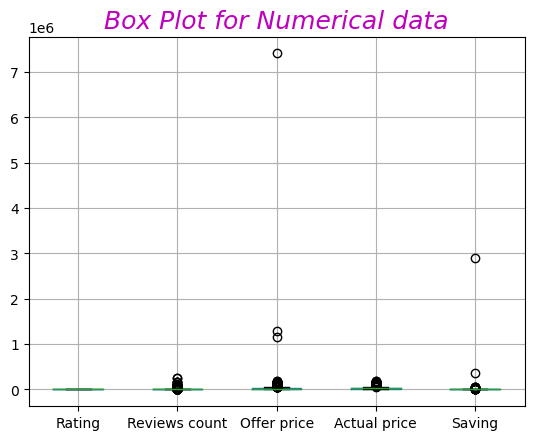

In [39]:
figure = data.boxplot()
figure.set_title("Box Plot for Numerical data",color='m', fontstyle='italic', fontsize=18)
plt.show()

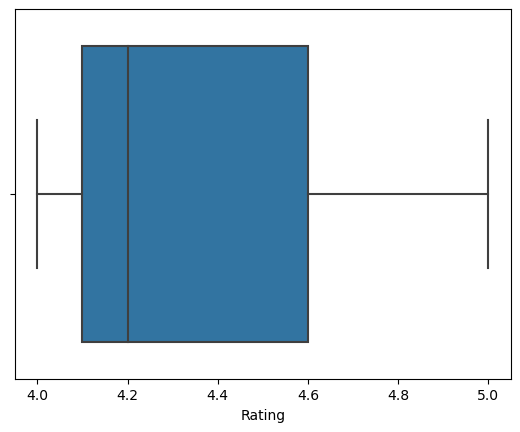

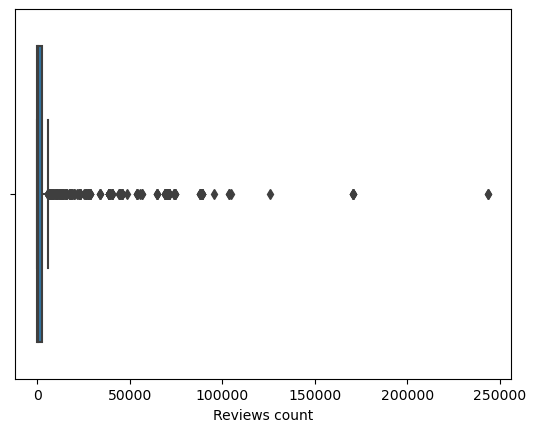

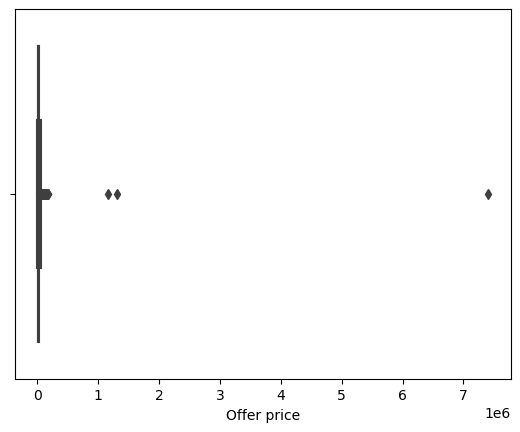

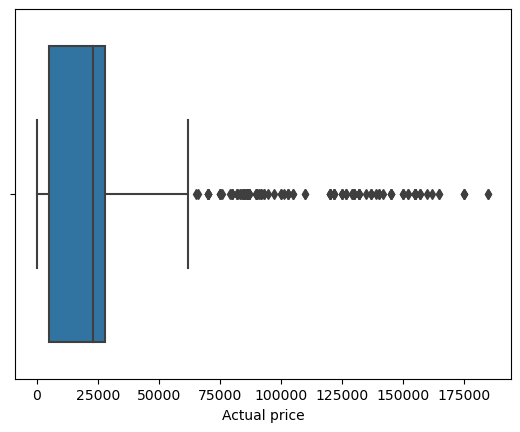

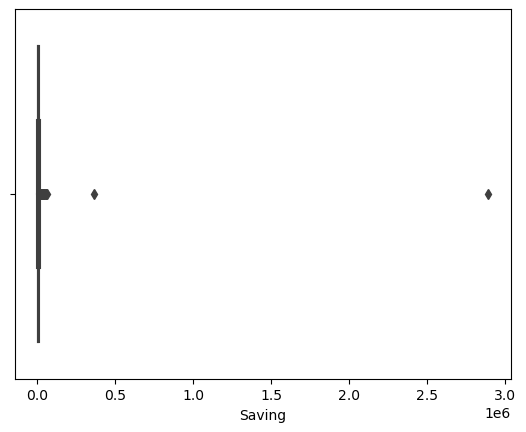

In [40]:
for i in data:
    sns.boxplot(data[i])
    plt.show()

- Now we can clearly observe the outliers individually and skewness of the individual variable which is positively skewed.

In [41]:
data.skew()

Rating            0.904333
Reviews count     5.164504
Offer price      32.635145
Actual price      2.391609
Saving           35.201497
dtype: float64

In [42]:
print("Mean:")
print(data.mean())
print("Median:")
print(data.median())
print(data.mean()>data.median())

Mean:
Rating               4.347521
Reviews count     7295.598780
Offer price      30558.883295
Actual price     28102.105263
Saving            7324.550725
dtype: float64
Median:
Rating               4.2
Reviews count      341.0
Offer price      13389.0
Actual price     22999.0
Saving            3500.0
dtype: float64
Rating           True
Reviews count    True
Offer price      True
Actual price     True
Saving           True
dtype: bool


### INFERENCE:
    A box plot is a visual representation of the five number summary which tells that the box plot show that the Numerical variables has lots of outliers.
##### Determination of skewness from box plot:
The skeweness of a data can be determined from the box plot, if the both segments are equal , then the distribution of the data is symmetric or it the both segments are unequal which is the bigger segment tells us how the data is skewed.

      1. The mean of 'Rating','Reviews count','Offer price','Actual price','Saving' is greater than the median of 'Rating','Reviews count','Offer price','Actual price','Saving', hence it is Positive or right skewed distribution.
    [Mean > Median = Positive or right skewed distribution] 

### Q9.  Handling outliers

#####  Using log transformation

In [43]:
df['Reviews count'] = np.log(df['Reviews count'])

In [44]:
df['Offer price'] = np.log(df['Offer price'])

In [45]:
df['Actual price'] = np.log(df['Actual price'])

In [46]:
df['Saving'] = np.log(df['Saving'])

In [47]:
df.skew()

Rating           0.904333
Reviews count   -0.036178
Offer price     -0.234341
Actual price    -0.536487
Saving          -0.711538
dtype: float64

In [48]:
df_num = df.select_dtypes(include=np.number)

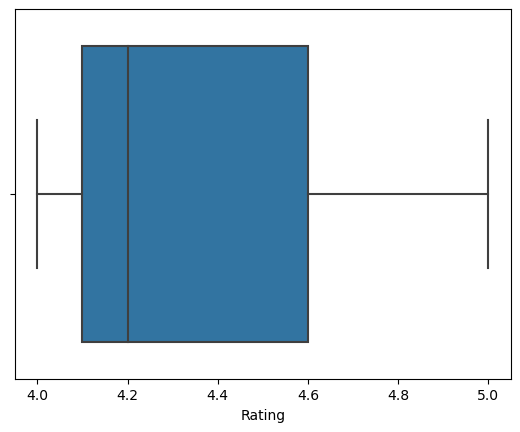

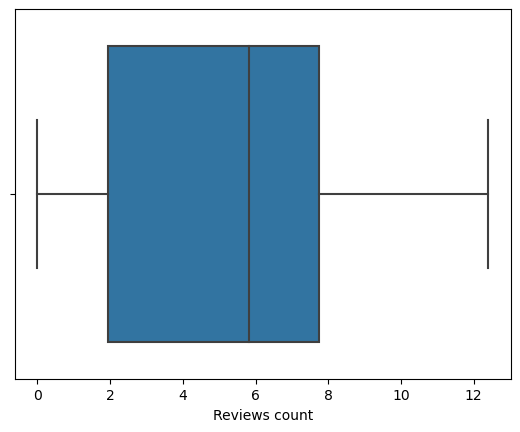

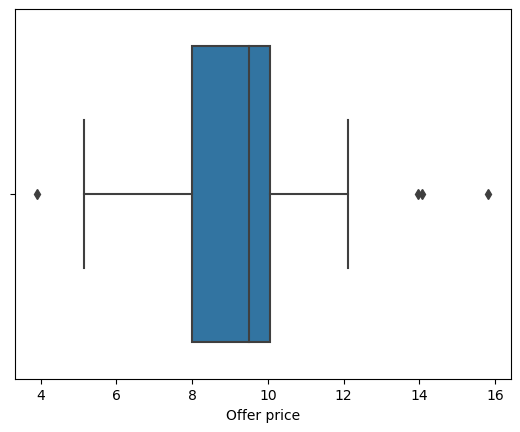

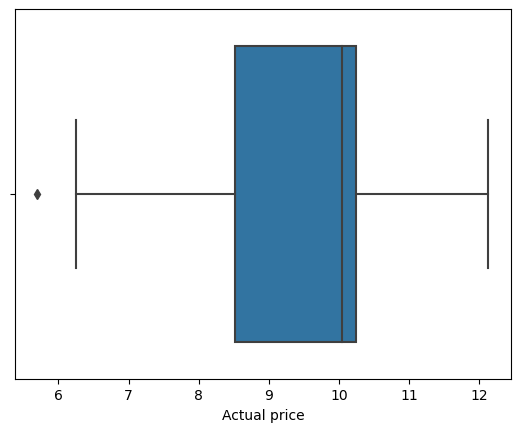

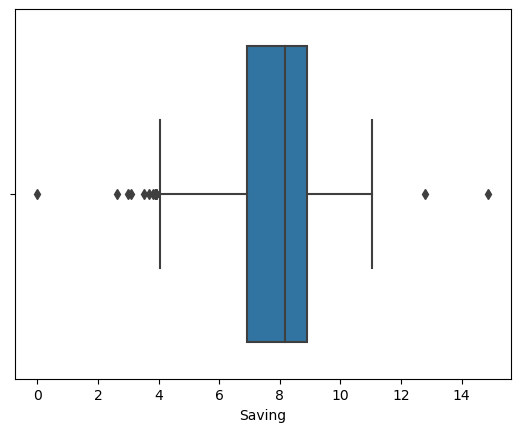

In [49]:
for i in df_num:
    sns.boxplot(df_num[i])
    plt.show()

- As we can see we have successfully dealt with outliers, We have reduced the outliers impact on distribution of the data which was causing the distribution with high skewness, Now we have reduced the skewness by applying transformation technique.

### Q10.  Find total products and average rating

In [50]:
total_products = len(df)
average_rating = df['Rating'].mean()
print("The total products :", total_products)
print("The average rating for the products: ", average_rating)

The total products : 1311
The average rating for the products:  4.347520976353917


### Q11. Plotting the distribution of smartphone and accessories ratings:

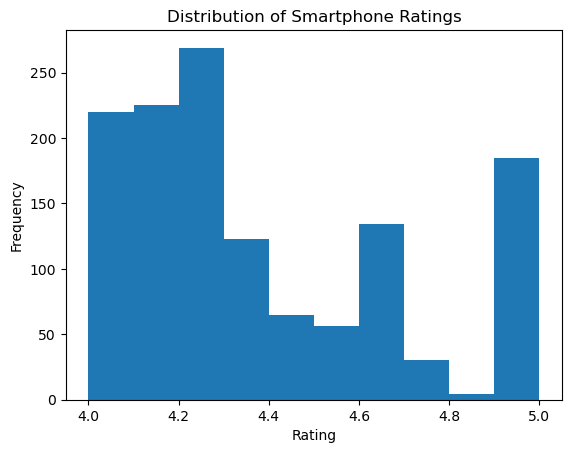

In [51]:
plt.hist(df['Rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Smartphone Ratings')
plt.show()

### Q12. Finding the average discount percentage:

In [52]:
df['Discount Percentage'] = (df['Actual price'] - df['Offer price']) / df['Actual price'] * 100
average_discount = df['Discount Percentage'].mean()
print(f"Average discount percentage: {average_discount:.2f}%")

Average discount percentage: 3.81%


### Q13. Top 10 Rated Smartphones & Accessories 2021 which has Highest Star rating in India on Amazon.

In [53]:
Highrated = df.sort_values(by=["Rating"], 
                                 ascending=False)
Highrated= Highrated.head(10)
print('Top 10 Rated Smartphones & Accessories 2021 which has Highest Star rating in India on Amazon :')
print(Highrated[['Smartphone','Rating']])

Top 10 Rated Smartphones & Accessories 2021 which has Highest Star rating in India on Amazon :
                                             Smartphone  Rating
1366  Nillkin Case for Samsung Galaxy A72 A 72 (6.7"...     5.0
1002  Nillkin Tempered Glass for Microsoft Surface P...     5.0
1052  Nillkin Case for Xiaomi Mi 11X 11 X / 11X Pro/...     5.0
1050  Nillkin Case for Xiaomi Mi 11X 11 X / 11X Pro/...     5.0
1041  Nillkin Super Frosted Hard Back Cover PC Case ...     5.0
1040  Nillkin Case for Huawei P40 Pro Plus (6.58" In...     5.0
1036                      Avaya 9641G IP Phone by Avaya     5.0
1032  I KALL K60 Gold Series Flip Mobile (2.4 Inch, ...     5.0
1022  Nillkin Super Frosted Shield Ultra Thin Hard P...     5.0
1013  Ziox X61 with Vibration 1.8" Display Wireless ...     5.0


### Q14. Top-rated smartphones based on review count:

In [54]:
top_review_smartphones = df.nlargest(5, 'Reviews count')
print("Top 5 smartphones based on review count:")
print(top_review_smartphones[['Smartphone', 'Reviews count']])

Top 5 smartphones based on review count:
                                           Smartphone  Reviews count
11  Samsung Galaxy M31 (Ocean Blue, 8GB RAM, 128GB...      12.403755
94  Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...      12.403755
13  Samsung Galaxy M21 2021 Edition (Arctic Blue, ...      12.046309
25  Samsung Galaxy M21 2021 Edition (Charcoal Blac...      12.046309
45  Samsung Galaxy M21 2021 Edition (Arctic Blue, ...      12.046309


### Q15. Insights about delivery options

In [55]:
delivery_options_count = df['Delivery'].value_counts()
print(delivery_options_count)

Paid                         652
FREE Delivery by Amazon      584
First Order Free Delivery     75
Name: Delivery, dtype: int64


### Q16. Total Sales insights

In [56]:
total_sales = df['Reviews count'].sum()
print(f"Total sales (sum of reviews): {total_sales}")

Total sales (sum of reviews): 6838.4020809985595


In [57]:
print("Basic Insights:")
print(f"Total products: {total_products}")
print(f"Average rating: {average_rating:.2f}")
print(f"Average discount: {average_discount:.2f}%")
print()

print("Top 10 Products by Rating:")
print(Highrated[['Smartphone','Rating']])
print()

print("Top 10 Products by Number of Reviews:")
print(top_review_smartphones[['Smartphone', 'Reviews count']])
print()

print("Delivery Options Insights:")
print(delivery_options_count)
print()

print("Sales Insights:")
print(f"Total sales (sum of reviews): {total_sales}")

Basic Insights:
Total products: 1311
Average rating: 4.35
Average discount: 3.81%

Top 10 Products by Rating:
                                             Smartphone  Rating
1366  Nillkin Case for Samsung Galaxy A72 A 72 (6.7"...     5.0
1002  Nillkin Tempered Glass for Microsoft Surface P...     5.0
1052  Nillkin Case for Xiaomi Mi 11X 11 X / 11X Pro/...     5.0
1050  Nillkin Case for Xiaomi Mi 11X 11 X / 11X Pro/...     5.0
1041  Nillkin Super Frosted Hard Back Cover PC Case ...     5.0
1040  Nillkin Case for Huawei P40 Pro Plus (6.58" In...     5.0
1036                      Avaya 9641G IP Phone by Avaya     5.0
1032  I KALL K60 Gold Series Flip Mobile (2.4 Inch, ...     5.0
1022  Nillkin Super Frosted Shield Ultra Thin Hard P...     5.0
1013  Ziox X61 with Vibration 1.8" Display Wireless ...     5.0

Top 10 Products by Number of Reviews:
                                           Smartphone  Reviews count
11  Samsung Galaxy M31 (Ocean Blue, 8GB RAM, 128GB...      12.403755
94  Samsu

### Q17. Relationship between the offer price of smartphones and accessories and their ratings on Amazon

In [58]:
df_data=df[["Offer price","Rating",]]
correlation = df["Offer price"].corr(df["Rating"])
print("The Correlation Matrix for Offer price and Number Of Ratings:")
print(df_data.corr())
print("The Correlation Value for Offer price and Number Of Ratings:")
print(correlation)

The Correlation Matrix for Offer price and Number Of Ratings:
             Offer price    Rating
Offer price     1.000000 -0.123924
Rating         -0.123924  1.000000
The Correlation Value for Offer price and Number Of Ratings:
-0.12392416250709264


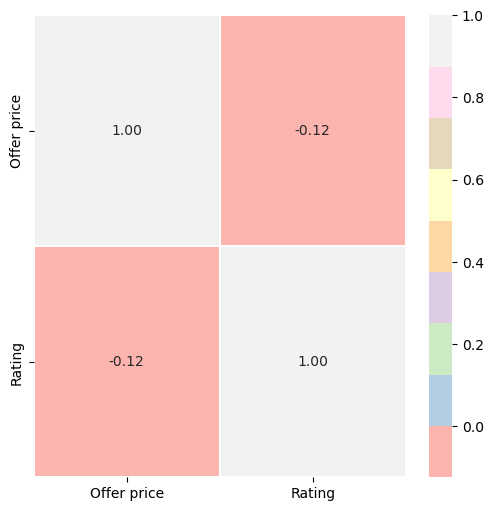

In [59]:
figure1 = plt.subplots(figsize=(6, 6))   
sns.heatmap(df_data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="Pastel1") # the color intensity is based on 
plt.show()

### INFERENCE:
    1.There is a negative linear correlation between the offer Price and the number of ratings for smartphones and accessories sold in Amazon.
    2.It means as the offer price increase the sales are decreasing.
    3.The smartphones and accessories with the lower offer prices are sold more in Amazon.